## [XGBoost classifier](https://www.qwak.com/post/xgboost-versus-random-forest#head-to-head-xgboost-vs-random-forest)
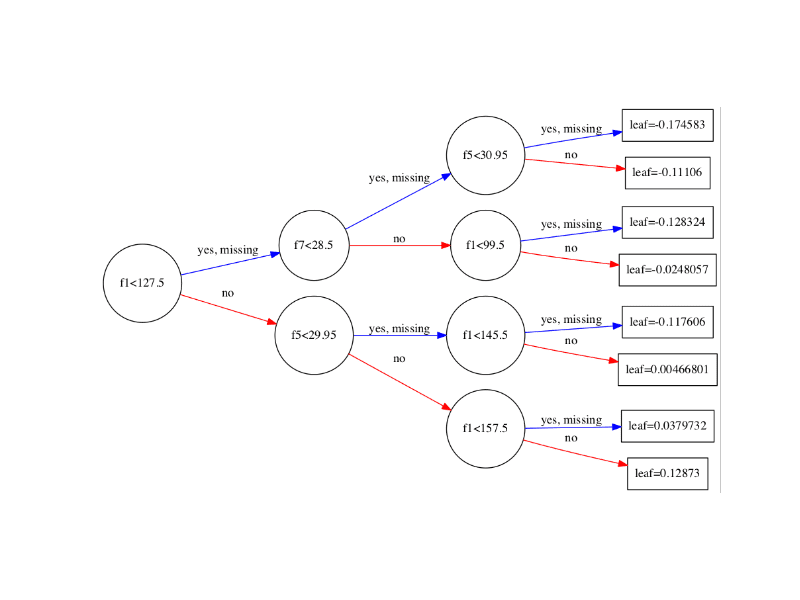
credit: MachineLearningMastery

I am using this model to see its performance when classifying my text data points to their labels. </br>

**How this differs from Random Forest:**

* subsequent tree nodes depend on previous nodes
* prunes certain paths based on the gain score between node and its children nodes, which prevents overfitting
* parameters are iteratively adjusted rather than them being uniformly set for the whole model.

In [18]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
title = "train_sample.csv"
df_train = pd.read_csv(title)
df_train

,Y,text
0,1,podcaster makes solemn promise to improve soun...
1,1,tsa agent can bring himself to make dad take o...
2,1,law schools now require applicants to honestly...
3,1,r stine reveals slappy from night of the livin...
4,0,psychic helps sniff out missing pet skunk
...,...,...
995,1,bank of america introduces new 50 underdraft fee
996,1,man just going to assume this counts as minced
997,1,report more americans willing to accept female...
998,1,lemur fantasizes about ripping face off next d...


## Preprocessing

1) Tokenization

chunk words in sentences into seperate entities.

2) Stemming

Stemming - get root word (running -> run)

Lemmentizing - root work from various forms of word (ran -> run , running -> run)

Removing stop words

In [20]:
import os
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


ps = PorterStemmer()

In [21]:
# finds important words in dataset tweets and stores them into array
# drops stop words

corpus = []
import re

#goes up to length of dataset
for i in range(len(df_train["text"])):
    train_text = re.sub('[^a-zA-Z]',' ',df_train["text"][i])
    train_text = train_text.lower()
    train_text = train_text.split()
    clean_review = [ps.stem(word) for word in train_text if not word in set(stopwords.words('english'))]
    clean_review = ' '.join(clean_review)
    corpus.append(clean_review)
    
# view cleaned text first 
corpus[0]

'podcast make solemn promis improv sound qualiti next episod'

3) Text Feature Extraction

This step includes converting the comments themselves to numerical data. I used TF-IDF (Term Frequency-Inverse Document Frequency), which gives a value to each word in a text from 0 to 1 to determine its importance. Other feature extraction methods can be used [here](https://medium.com/@eskandar.sahel/exploring-feature-extraction-techniques-for-natural-language-processing-46052ee6514)

Why I used TF-IDF: it determines importance of word in my collection of texts based on its frequency in both the singular text and collection of texts. This also accounts for all words by assigning them a value ranging from 0 - 1 instead of prioritizing top x words.</br>

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)


In [22]:
# #method 2 - from eskandar.sahel

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf_vec = TfidfVectorizer() #control hyperparameter tunings
X_tfidf = tfidf_vec.fit_transform(corpus)
print('TF-IDF:')
print(tfidf_vec.get_feature_names_out()[:10])
print(X_tfidf.toarray()[0][:10])

X = tfidf_vec.fit_transform(corpus).toarray()

TF-IDF:
['ab' 'abandon' 'abba' 'abomin' 'abort' 'abram' 'absenc' 'absolut' 'abu'
 'academ']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
y = df_train.iloc[ : , 0].values
y

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,

## Running Preprocessed Data - XGBooster 

Our "control": no hyperparameter tuning

In [24]:
# pip install xgboost

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
# cross validation score
labels = df_train.Y
models = [
    XGBClassifier()
]

#n_estimators = number of trees made before making a decision 

cross_value_scored = []
for model in models:
    model_name = model.__class__.__name__
    accuracies= cross_val_score(model, X, labels, scoring = 'accuracy', cv = 5)
    for accuracy in accuracies:
        cross_value_scored.append((model_name, accuracy))

In [26]:
# make a dataframe of cross_val_scor
df_cv = pd.DataFrame(cross_value_scored, columns =['model_name', 'accuracy'])
acc = pd.concat([df_cv.groupby('model_name').accuracy.mean(),df_cv.groupby('model_name').accuracy.std()], axis= 1,ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
XGBClassifier,0.638,0.021679


## Hyperparameter Tuning

Explanation of parameters:</br>

* **min_child_weight** : controls the minimum value of the hessian (second derivative of loss function) required for a split to occur at child node. Higher values allow the model to deepen the tree with more informative splits than those of lower values.</br>
</br>

* **Gamma** : This value sets the minimum threshold for the gain value. If the gain value (difference in the amount of improvement in the model with the split compared to without) is greater than the gamma value, the split will be made. Higher value means the model will expect the gain to be extremely high, meaning the model will be more accurate than that with a small gamma value.</br>
</br>

* **Subsample** : This value sets how much of the whole dataset will be used to train the model for each iteration. For example, if the subsample value is .6. then 60% of the dataset is used as training.</br>
</br>

* **colsample_bytree** : Essentially subsampling value but for each tree made by model.
</br>

* **max_depth** : How many levels deep the tree goes.

Grid search</br>

Source: [Hyperparameter Grid Search with XGBoost- tilii7](https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost)

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [34]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from datetime import datetime

folds = 3
param_comb = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 3 candidates, totalling 9 fits

 Time taken: 0 hours 0 minutes and 7.5 seconds.


Results:

In [36]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([1.56199916, 1.52333132, 1.26666903]), 'std_fit_time': array([0.12732177, 0.10804242, 0.3979654 ]), 'mean_score_time': array([0.02966714, 0.02966595, 0.02799996]), 'std_score_time': array([0.00094443, 0.0017002 , 0.00373758]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 10, 1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 4, 3],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[2, 5, 1.5],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_colsample_bytree': masked_array(data=[1.0, 1.0, 0.8],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'s

Randomized Search

[Code referenced](https://jayant017.medium.com/hyperparameter-tuning-in-xgboost-using-randomizedsearchcv-88fcb5b58a73)

# Train-Test Split on Updated Parameters

In [37]:
# spliting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [38]:
xgb = XGBClassifier(subsample= 0.6, 
                    min_child_weight=1,
                    max_depth= 5, 
                    gamma= 1.5,
                    colsample_bytree= 0.8)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = xgb.predict(x_test)
print('Classification report')
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       103
           1       0.62      0.41      0.50        97

    accuracy                           0.59       200
   macro avg       0.60      0.59      0.58       200
weighted avg       0.60      0.59      0.58       200

